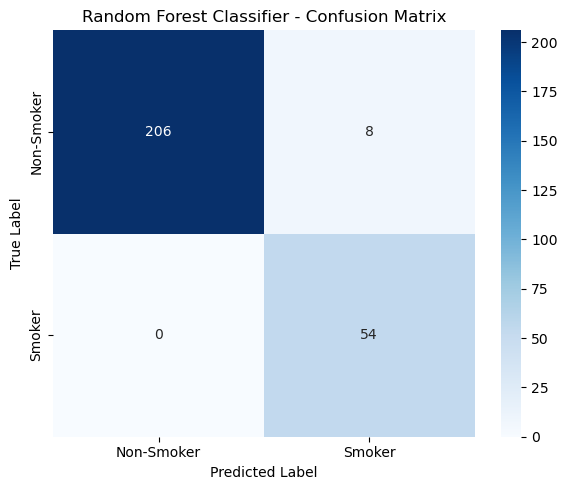

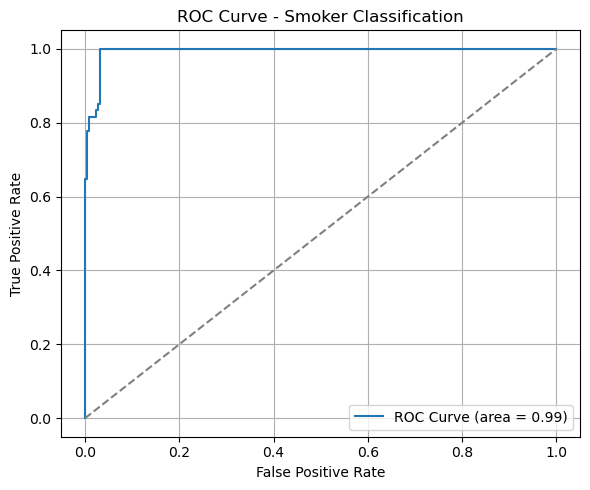

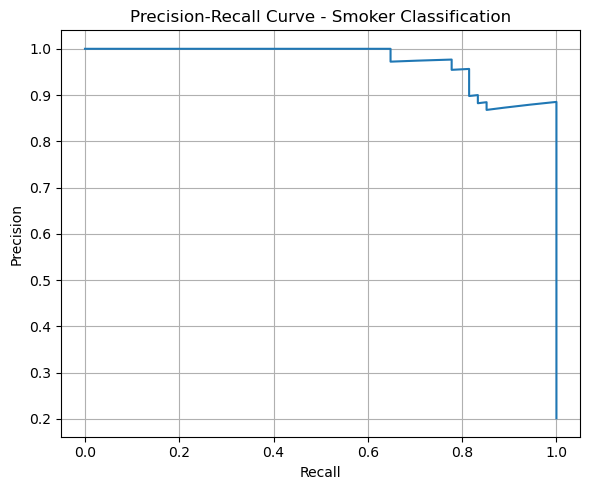

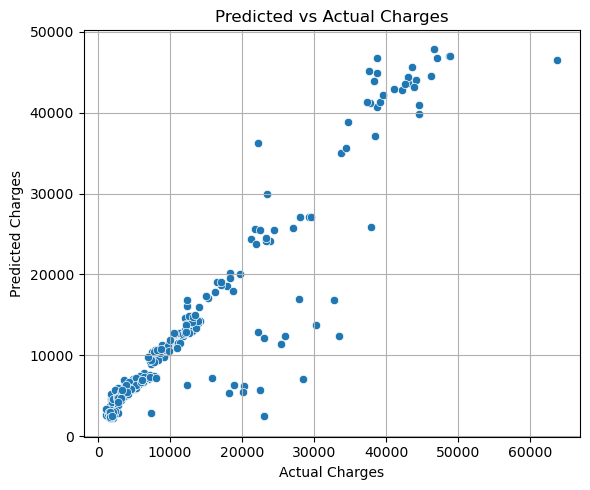

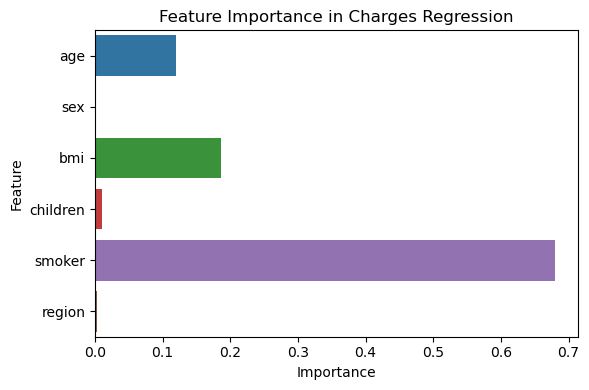

({'accuracy': 0.9701492537313433,
  'classification_report': {'0': {'precision': 1.0,
    'recall': 0.9626168224299065,
    'f1-score': 0.9809523809523809,
    'support': 214.0},
   '1': {'precision': 0.8709677419354839,
    'recall': 1.0,
    'f1-score': 0.9310344827586207,
    'support': 54.0},
   'accuracy': 0.9701492537313433,
   'macro avg': {'precision': 0.935483870967742,
    'recall': 0.9813084112149533,
    'f1-score': 0.9559934318555008,
    'support': 268.0},
   'weighted avg': {'precision': 0.9740009629272989,
    'recall': 0.9701492537313433,
    'f1-score': 0.9708942969879665,
    'support': 268.0}},
  'roc_auc': 0.9932502596053998},
 {'mse': 19793276.08154161,
  'mae': 2553.9704798792486,
  'r2': 0.8725060366590471})

In [10]:
# Re-import required libraries after code state reset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_curve, auc, precision_recall_curve, mean_squared_error,
    mean_absolute_error, r2_score
)
import numpy as np

# Load and encode dataset
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
le = LabelEncoder()
for col in ['sex', 'smoker', 'region']:
    df[col] = le.fit_transform(df[col])

# --- Classification: Predicting 'smoker' ---
X_cls = df.drop(columns=['smoker'])
y_cls = df['smoker']
X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Classification Visualizations
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Smoker", "Smoker"], yticklabels=["Non-Smoker", "Smoker"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Classifier - Confusion Matrix")
plt.tight_layout()
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Smoker Classification")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Smoker Classification")
plt.grid()
plt.tight_layout()
plt.show()

# --- Regression: Predicting 'charges' ---
X_reg = df.drop(columns=['charges'])
y_reg = df['charges']
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
reg = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
reg.fit(Xr_train, yr_train)
yr_pred = reg.predict(Xr_test)

plt.figure(figsize=(6, 5))
sns.scatterplot(x=yr_test, y=yr_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.grid()
plt.tight_layout()
plt.show()

importances = reg.feature_importances_
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=X_reg.columns)
plt.title("Feature Importance in Charges Regression")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Return summary metrics
classification_metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "classification_report": classification_report(y_test, y_pred, output_dict=True),
    "roc_auc": roc_auc
}

regression_metrics = {
    "mse": mean_squared_error(yr_test, yr_pred),
    "mae": mean_absolute_error(yr_test, yr_pred),
    "r2": r2_score(yr_test, yr_pred)
}

classification_metrics, regression_metrics


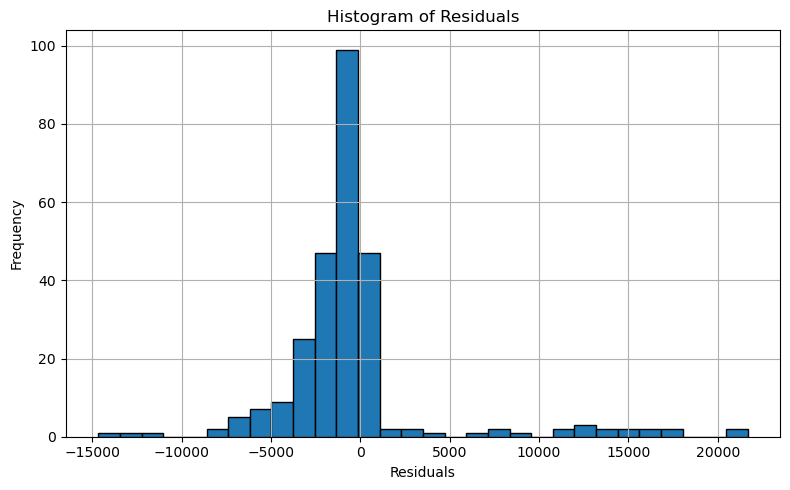

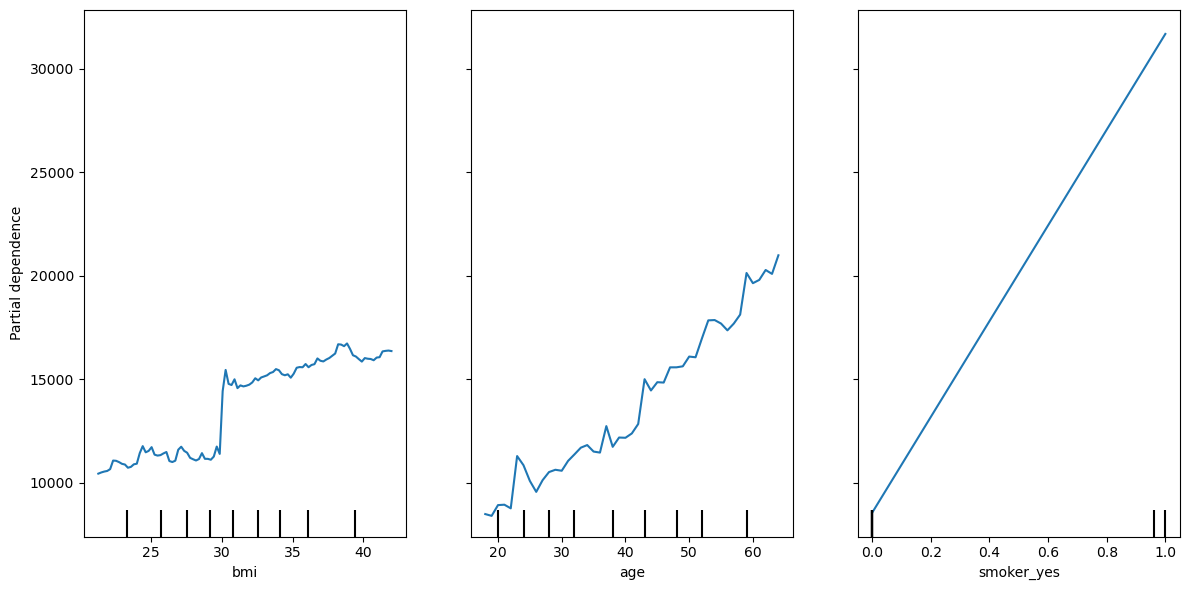

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import mean_squared_error

# Load and prepare dataset
insurance = pd.read_csv("insurance.csv")  # use your actual path
insurance = pd.get_dummies(insurance, drop_first=True)

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions and residuals
y_pred = rf.predict(X_test)
residuals = y_test - y_pred

# 1. Histogram of Residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Partial Dependence Plots
features_to_plot = ['bmi', 'age', 'smoker_yes']  # use correct column names from get_dummies
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(rf, X_test, features_to_plot, ax=ax)
plt.tight_layout()
plt.show()


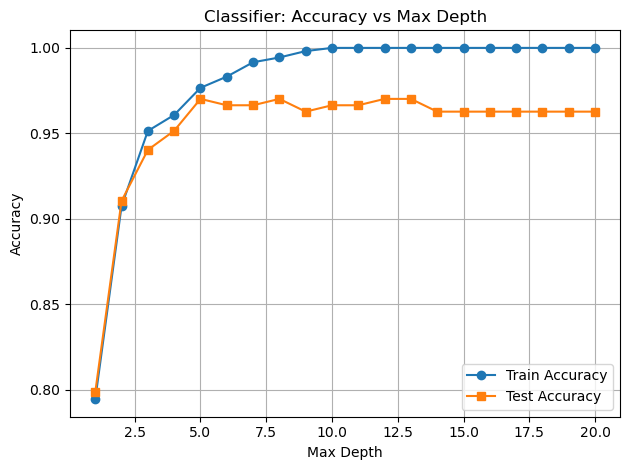

In [12]:
depths = list(range(1, 21))
train_acc = []
test_acc = []

for d in depths:
    clf = RandomForestClassifier(max_depth=d, random_state=42)
    clf.fit(X_train_cls, y_train_cls)
    train_acc.append(clf.score(X_train_cls, y_train_cls))
    test_acc.append(clf.score(X_test_cls, y_test_cls))

plt.plot(depths, train_acc, label="Train Accuracy", marker='o')
plt.plot(depths, test_acc, label="Test Accuracy", marker='s')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Classifier: Accuracy vs Max Depth")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


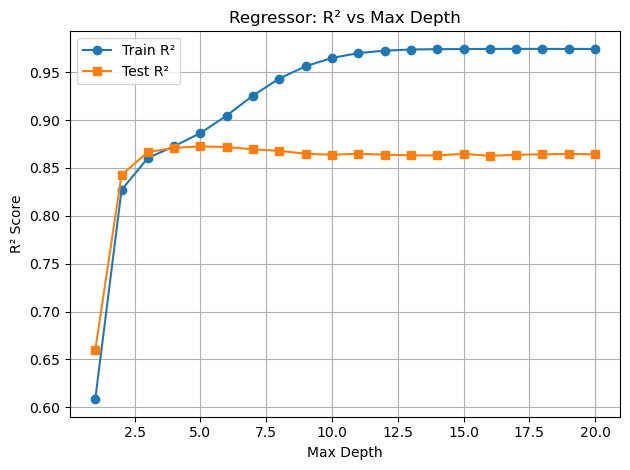

In [13]:
depths = list(range(1, 21))
train_r2 = []
test_r2 = []

for d in depths:
    reg = RandomForestRegressor(max_depth=d, random_state=42)
    reg.fit(Xr_train, yr_train)
    train_r2.append(reg.score(Xr_train, yr_train))
    test_r2.append(reg.score(Xr_test, yr_test))

plt.plot(depths, train_r2, label="Train R²", marker='o')
plt.plot(depths, test_r2, label="Test R²", marker='s')
plt.xlabel("Max Depth")
plt.ylabel("R² Score")
plt.title("Regressor: R² vs Max Depth")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
